In [ ]:
# we import the necessary libraries
import torch 
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import cross_val_score



In [ ]:
# Load the data:
raw_data = pd.read_csv('diabetes.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Data Cleaning:
# we check for missing values
missing_values = ["", "nan", "Null", "null"]
filtered_raw_data = raw_data.drop_duplicates()
filtered_raw_data = filtered_raw_data.replace(missing_values, numpy.nan)
filtered_raw_data = filtered_raw_data.dropna()
filtered_raw_data.shape 


(768, 9)

In [ ]:
filtered_raw_data[filtered_raw_data == 0].drop("Outcome", axis=1).count()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
# use knn to impute the missing values in the diabetes dataset
# change all the 0 values in the columsn excepting pregenancies and Outcome to nan
filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, numpy.nan)
filtered_raw_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2>EDA:</h2>

<h3>KNN Imputer:</h3>

In [ ]:
imputer = KNNImputer(n_neighbors=5)
knn_imputed = pd.DataFrame(imputer.fit_transform(filtered_raw_data), columns=filtered_raw_data.columns)
knn_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [ ]:
knn_imputed.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


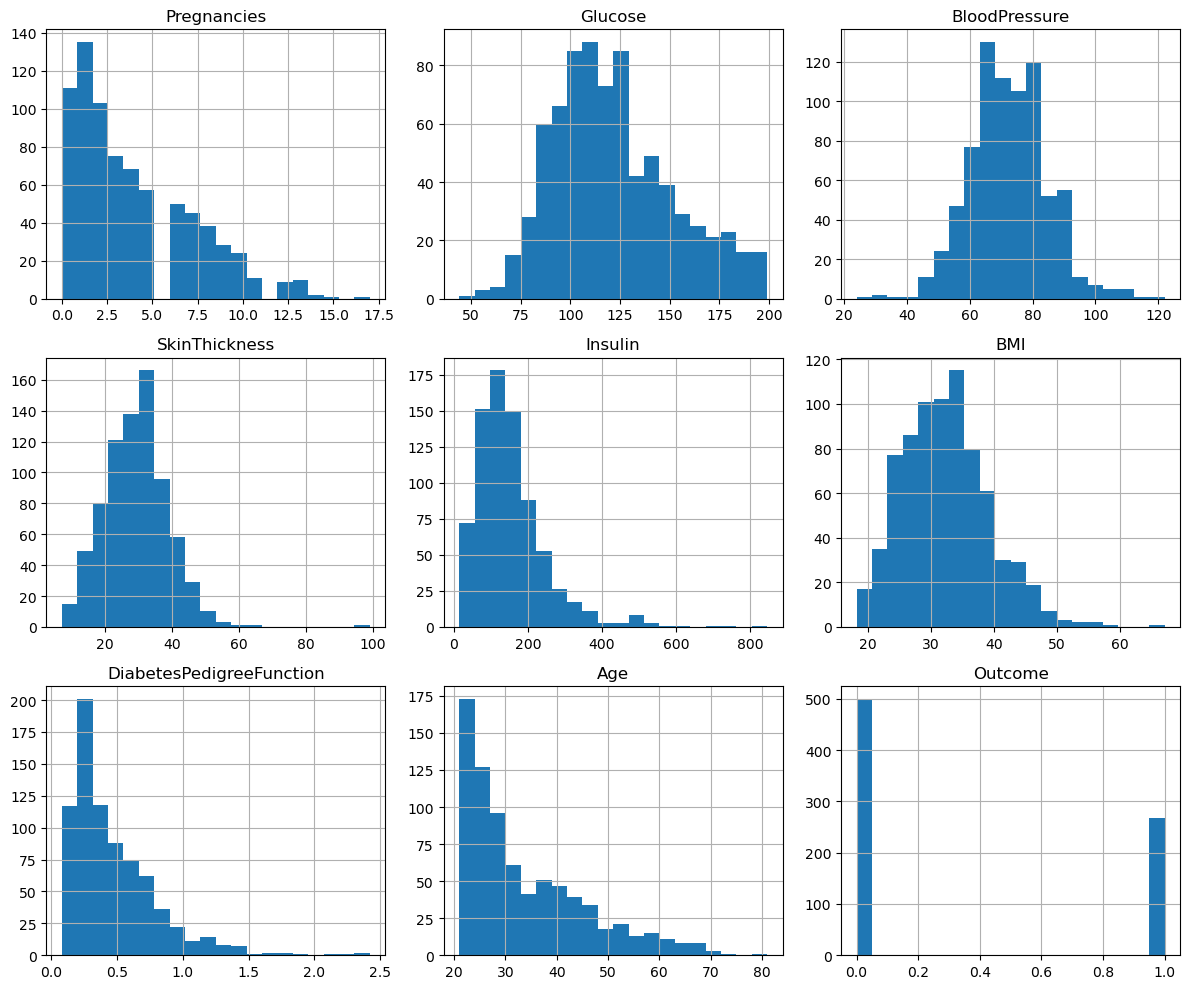

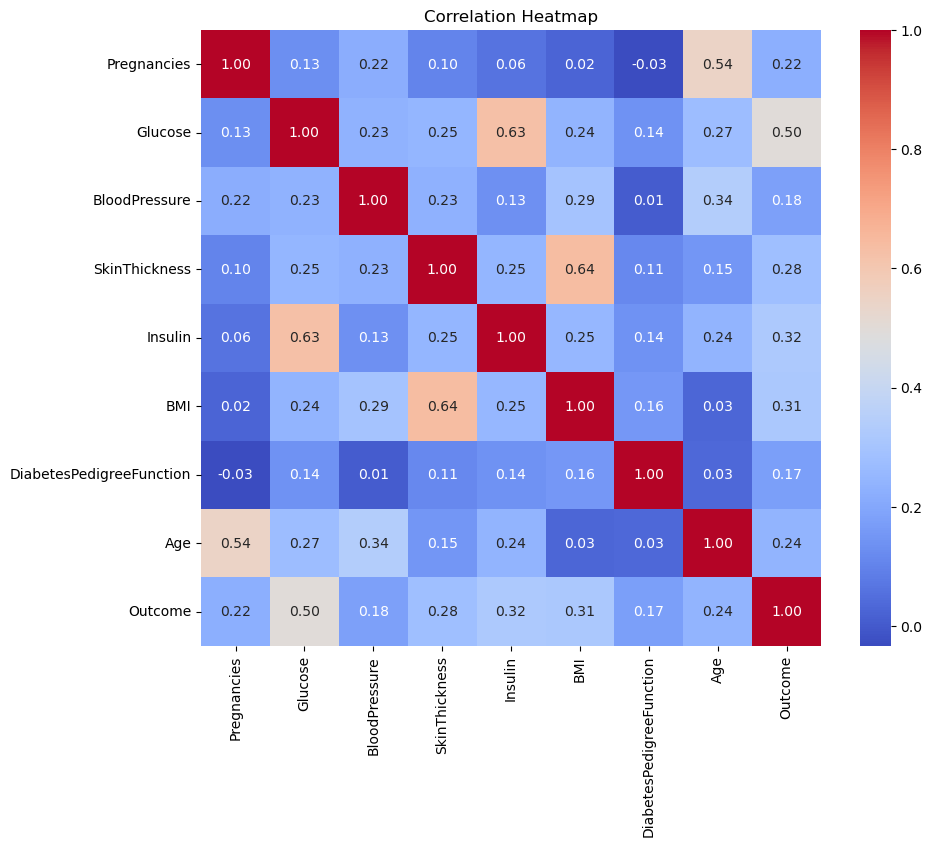

In [ ]:
# Histograms for numerical columns
knn_imputed.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(knn_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<h3>Mix use of Median and Mean</h3>

In [ ]:
meanMax_imputed = filtered_raw_data.copy()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=meanMax_imputed)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=meanMax_imputed)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=meanMax_imputed)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=meanMax_imputed)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=meanMax_imputed)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=meanMax_imputed)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=meanMax_imputed)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=meanMax_imputed)

In [ ]:
# Imputing NaN values in features(columns) according their distribution
meanMax_imputed['Glucose'].fillna(meanMax_imputed['Glucose'].mean(), inplace=True)
meanMax_imputed['BloodPressure'].fillna(meanMax_imputed_2['BloodPressure'].mean(), inplace=True)
meanMax_imputed['SkinThickness'].fillna(meanMax_imputed['SkinThickness'].median(), inplace=True)
meanMax_imputed['BMI'].fillna(meanMax_imputed['BMI'].median(), inplace=True)
meanMax_imputed['Insulin'].fillna(meanMax_imputed['Insulin'].median(), inplace=True)

In [ ]:
meanMax_imputed.describe()

<h3>Another method to handle missing values</h3>

In [ ]:
meanMax_imputed_2 = filtered_raw_data.copy()

In [ ]:
# Changing 0 values with NaN
meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, np.NaN)
meanMax_imputed_2.isnull().sum()



In [ ]:
def median_target(column):   
    temp = meanMax_imputed_2[meanMax_imputed_2[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [ ]:
median_target('Insulin')

In [ ]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 102.5
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 169.5



In [ ]:
median_target('Glucose')

In [ ]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 107
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 140

In [ ]:
median_target('SkinThickness')

In [ ]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 27
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 32


In [ ]:
median_target('BloodPressure')

In [ ]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 70
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [ ]:
median_target('BMI')


In [ ]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 30.1
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
meanMax_imputed_2.isnull().sum()

In [ ]:
meanMax_imputed_2.describe().T

<h2>Model Training</h2>

<h3>Random Forest</h3>

<h4>KNN</h4>

In [ ]:
# Split the data into features and target
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80        99
         1.0       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



<h4>Mean Max</h4>

<h4>Other</h4>